<a href="https://colab.research.google.com/github/Crisosth/IA/blob/main/Fuzzy_Smart_Washing_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=d504008e7bbfefc2278a657e13d02731693a0fb050779c82c04031cee559b5e0
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy



Classifique qual o tipo de tecido [0-10]: 7

Classifique o nível de sujeira [0-10]: 4

Porcentagem da Potencia:  40.0 %




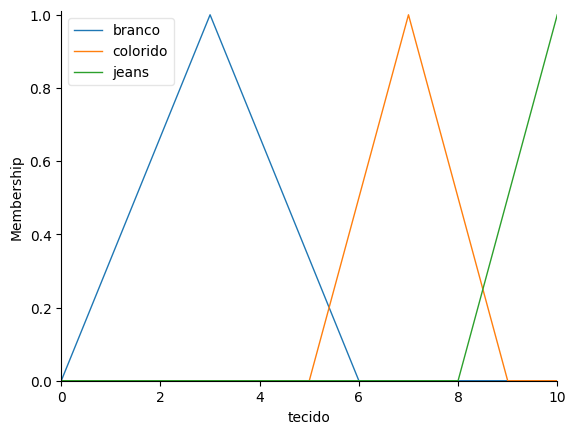

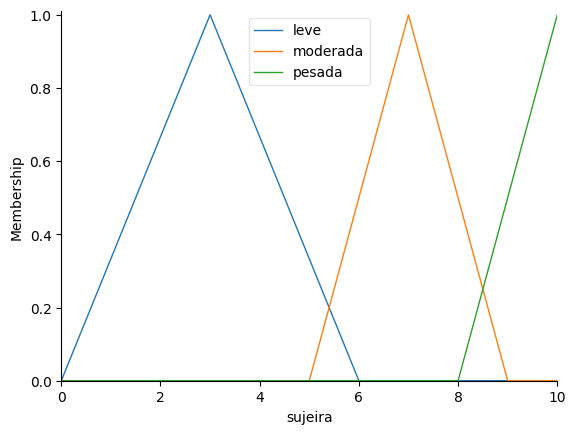

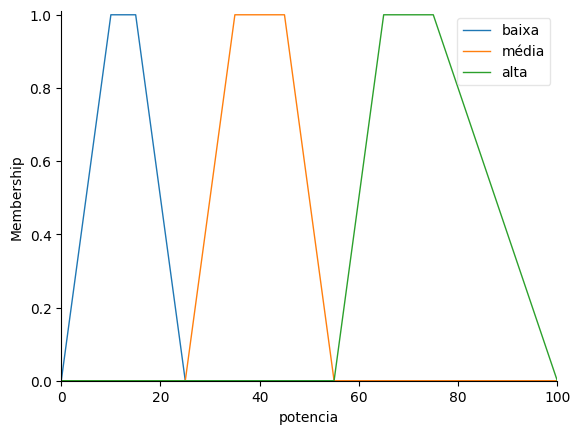

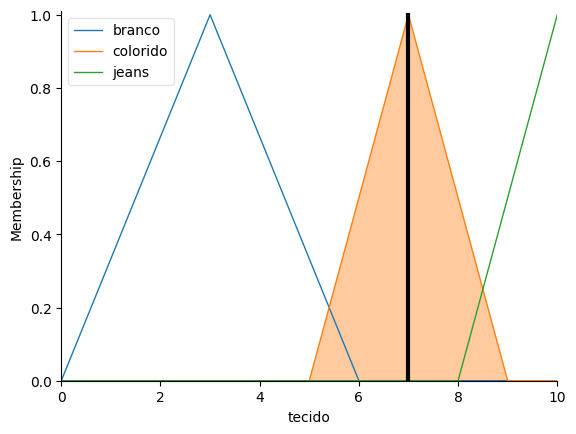

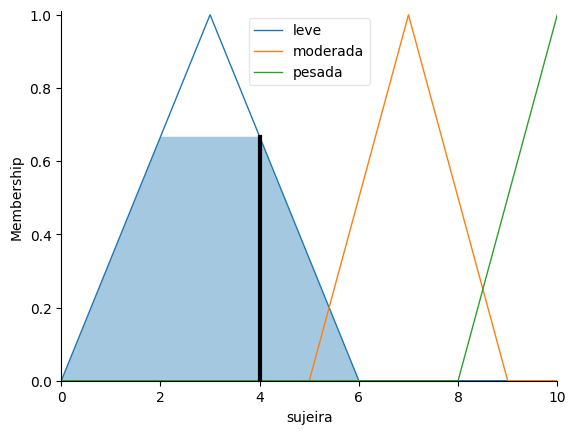

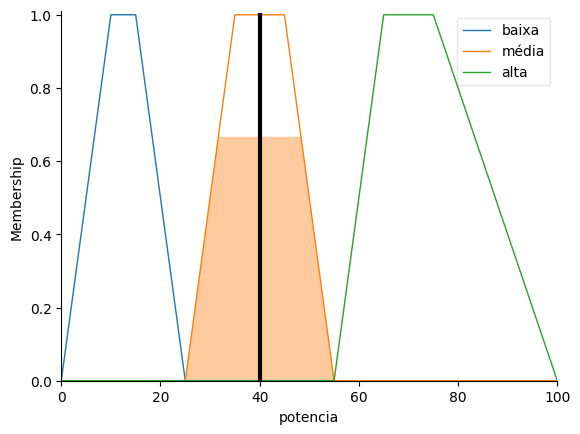

In [ ]:
#instalaçao das bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#cria antecedentes -  variaveis de entrada
tecido = ctrl.Antecedent(np.arange(0, 11, 1), 'tecido') #valores de 0 a 10
sujeira = ctrl.Antecedent(np.arange(0, 11, 1), 'sujeira') #valores de 0 a 10

#cria consequente - variavel de saída
potencia = ctrl.Consequent(np.arange(0, 101, 1), 'potencia') #valores de 0 a 100

#Cria as funções de pertinencia:
#1) cria função de pertinencia automatica padrão triangular para comida
# faz o mapeamento automatico entre os valores numéricos e os difusos
tecido['branco'] = fuzz.trimf(tecido.universe, [0, 3, 6]) #função triangular
tecido['colorido'] = fuzz.trimf(tecido.universe,[5, 7, 9]) #função triangular
tecido['jeans'] = fuzz.trimf(tecido.universe,[8, 10, 10]) #função triangular

sujeira['leve'] = fuzz.trimf(sujeira.universe, [0, 3, 6]) #função triangular
sujeira['moderada'] = fuzz.trimf(sujeira.universe,[5, 7, 9]) #função triangular
sujeira['pesada'] = fuzz.trimf(sujeira.universe,[8, 10, 10]) #função triangular

potencia['baixa'] = fuzz.trapmf(potencia.universe, [0, 10, 15, 25 ]) #função trapezoidal
potencia['média'] = fuzz.trapmf(potencia.universe, [25, 35, 45, 55]) #função trapezoidal
potencia['alta'] = fuzz.trapmf(potencia.universe, [55, 65, 75, 100]) #função trapezoidal

#mostra graficamente as funções de pertinencia criadas
tecido.view()
sujeira.view()
potencia.view()

#cria as regras de decisão difusas
rule1 = ctrl.Rule(sujeira['leve'] & tecido['branco'], potencia['baixa'])
rule2 = ctrl.Rule(sujeira['leve'] & tecido['colorido'], potencia['média'])
rule3 = ctrl.Rule(sujeira['pesada'] | tecido['jeans'], potencia['alta'])
rule4 = ctrl.Rule(sujeira['moderada'] & tecido['branco'], potencia['média'])
rule5 = ctrl.Rule(sujeira['moderada'] & tecido['colorido'], potencia['alta'])
rule6 = ctrl.Rule(sujeira['pesada'] | tecido['branco'], potencia['alta'])

#cria sistema fuzzy:

#1)cria a classe de controle do sistema fuzzy, usando as regras definidas
ControladorPotencia = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

#2)cria o objeto da classe Sistema fuzzy
SistemaPotencia = ctrl.ControlSystemSimulation(ControladorPotencia)

#entrada de dados no sistema fuzzy - Nota de qualidade da comida - fuzzificação
tecidoNivel = input("\nClassifique qual o tipo de tecido [0-10]: ")
SistemaPotencia.input['tecido'] = float(tecidoNivel)

#entrada de dados no sistema fuzzy - Nota de qualidade do serviço - fuzzificação
sujeiraNivel = input("\nClassifique o nível de sujeira [0-10]: ")
SistemaPotencia.input['sujeira'] = float(sujeiraNivel)

#Sistema fuzzy processa e defuzzifica o resultado da gorjeta
SistemaPotencia.compute()

#Saida de dados do sistema fuzzy - defuzzificação
print("\nPorcentagem da Potencia: ", round(SistemaPotencia.output['potencia'], 2), "%\n\n")

#Mostra graficamente o resultado da simulação (Fuzzificação e Defuzzificação)
tecido.view(sim=SistemaPotencia)
sujeira.view(sim=SistemaPotencia)
potencia.view(sim=SistemaPotencia)